In [1]:
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

$$ x_t = 0.7 * x_{t-1} - 0.1 * x_{t-2} + w_t $$

In [21]:
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [23]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    
    mean_x = x.mean()
    acfs = []
    
    acf_0 = 0 
    for i in range(0, len(x)):
        acf_0 = acf_0 + ((x[i] - mean_x) * (x[i] - mean_x))
    acf_0 = acf_0 / len(x)
    
    for j in range(nlags+1):
        total = 0
        for i in range(0, len(x)-j):
            total = total + ((x[i+j] - mean_x) * (x[i] - mean_x))
        total = total / len(x)
        total = total / acf_0
        acfs.append(total)
    
    return acfs

Analytical -> rho_1 = 0.6363636363636362, rho_2 = 0.34545454545454535
Empirical -> rho_1 = 0.6230574336895631, rho_2 = 0.3224841211859586


Text(0.5, 1.0, 'Empirical ACF vs Analytical ACF')

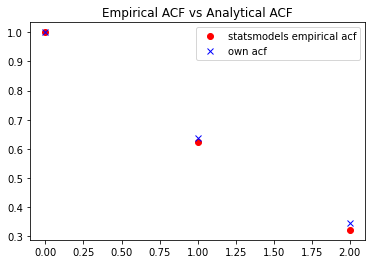

In [28]:
# Analytical ACF calculations

phi_1 = 0.7
phi_2 = -0.1

rho_1 = phi_1 / (1 - phi_2)
rho_2 = ((phi_1 * phi_1)/(1 - phi_2)) + phi_2

print(f"Analytical -> rho_1 = {rho_1}, rho_2 = {rho_2}")

# Data simulation for empirical ACF

x_a, x_b = np.random.normal(0, 1), np.random.normal(0, 1) # Initially series equal to white noise with variance 1

n = 10000
x = []
for i in range(n):
    x.append(0.7 * x_a - 0.1 * x_b + np.random.normal(0, 1))
    x_b = x_a
    x_a = x[-1]
x = np.array(x)
transient = 1000
x = x[transient::]

# Estimated ACF calculation

acf_val = acf_impl(x=x, nlags=2)

# Plots
print(f"Empirical -> rho_1 = {acf_val[1]}, rho_2 = {acf_val[2]}")
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels empirical acf')
plt.plot([1, rho_1, rho_2], 'xb', label='own acf')
plt.legend();
plt.title('Empirical ACF vs Analytical ACF')

Text(0.5, 1.0, 'Empirical ACF vs Analytical ACF')

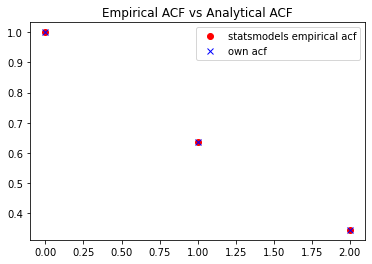

In [49]:
acfs_1 = []
ts = []
for t in range(500, 5000):
    y = np.random.normal(0, 1, t)
    ts.append(t)
    acfs_1.append(acf(y)[1])
    
acfs_1 = np.array(acfs_1)
ts = np.array(ts)

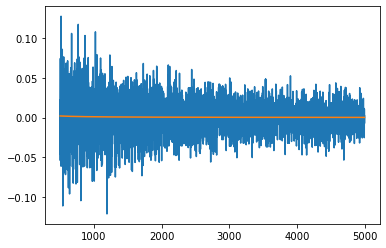

In [50]:
plt.plot(ts, acfs_1)
plt.plot(ts, 1/ts)

In [56]:
ts = []
var_acfs_1 = []
by_ts = []

for t in range(500, 2500, 3):
    acfs_1 = []
    for i in range(500):
        y = np.random.normal(0, 1, t)
        acfs_1.append(acf(y)[1])
    
    acfs_1 = np.array(acfs_1)
    var_acfs_1.append(np.var(acfs_1))
    by_ts.append(1/t)
    ts.append(t)
    

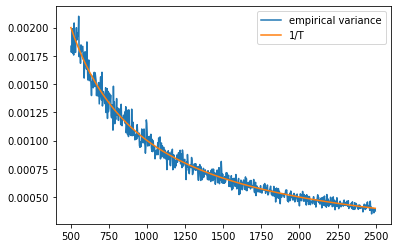

In [58]:
plt.plot(ts, var_acfs_1, label='empirical variance')
plt.plot(ts, by_ts, label='1/T')
plt.legend()

In [52]:
np.var(acfs_1), 1/t

(0.00046561840341365974, 0.0005)

0.06229732527187778